In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
'''
NOTE: when using VSCode, change the Jupyter Extension Notebook File Root setting from ${fileDirname} to ${workspaceRoot}
in order to have relative paths work when importing csv. Setting makes the project folder the root directory,
not the folder where this notebook is saved
'''

import os
os.getcwd()

'c:\\Users\\rgkal\\Documents\\chem_reactor_ml'

In [3]:
df = pd.read_csv('data_generation/reactor_performance_data.csv')

In [4]:
df.head()

,Mode,Fao,Fbo,P,To,Cto,m,Ta,T_max,Fa_out,Fb_out,Fc_out,Fd_out,Cc_out,Xa,Yc
0,1.0,5.882026,10.400157,5.401539,320.168039,0.205743,13.735116,315.471541,677.484905,0.086902,0.522703,3.654131,1.284596,0.075450,0.985226,0.630553
1,1.0,5.475044,9.848643,4.869216,303.695387,0.195527,10.288087,339.179167,667.541928,0.094176,0.523220,3.585476,1.077235,0.064267,0.982799,0.666338
2,1.0,5.380519,10.121675,5.138381,303.003069,0.206807,12.988158,322.999707,649.174802,0.090616,0.656290,3.896878,0.835815,0.077688,0.983158,0.736663
3,1.0,5.156534,9.145904,3.663929,305.882567,0.146076,11.728872,317.763891,404.957770,3.744916,6.322772,1.411489,0.000078,0.013567,0.273753,0.999908
4,1.0,6.134877,8.545634,4.942513,298.315345,0.202050,13.065558,339.326248,611.421496,0.606274,0.221884,2.111783,2.050092,0.043985,0.901176,0.381974


In [5]:
df.isnull().sum()

Mode      0
Fao       0
Fbo       0
P         0
To        0
Cto       0
m         0
Ta        0
T_max     0
Fa_out    0
Fb_out    0
Fc_out    0
Fd_out    0
Cc_out    0
Xa        0
Yc        0
dtype: int64

In [6]:
df.describe().transpose().apply(lambda s: s.apply('{0:.3f}'.format))

,count,mean,std,min,25%,50%,75%,max
Mode,100000.000,1.500,0.671,1.000,1.000,1.000,2.000,3.000
Fao,100000.000,4.297,0.999,2.414,3.131,4.580,5.102,6.951
Fbo,100000.000,7.904,2.868,3.235,4.188,9.135,10.219,14.056
P,100000.000,6.698,2.380,2.533,4.814,5.370,9.567,12.010
To,100000.000,370.006,92.186,262.532,298.192,308.381,493.189,531.813
Cto,100000.000,0.217,0.033,0.097,0.193,0.215,0.240,0.403
m,100000.000,8.253,2.783,0.611,5.392,8.454,10.423,18.572
Ta,100000.000,325.006,8.563,284.633,319.809,325.018,330.213,364.986
T_max,100000.000,662.462,62.646,319.242,633.166,660.335,688.470,1081.961
Fa_out,100000.000,0.170,0.491,0.000,0.001,0.021,0.110,5.759


In [7]:
df_1 = df[df['Mode'] == 1.0]
df_2 = df[df['Mode'] == 2.0]
df_3 = df[df['Mode'] == 3.0]

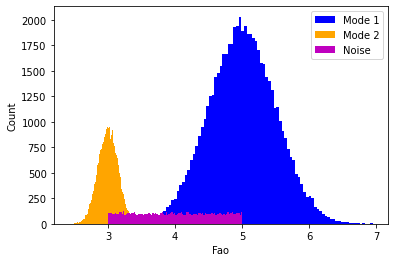

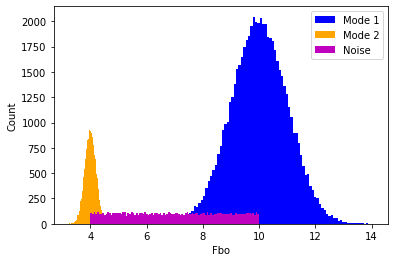

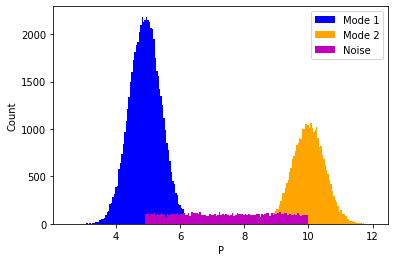

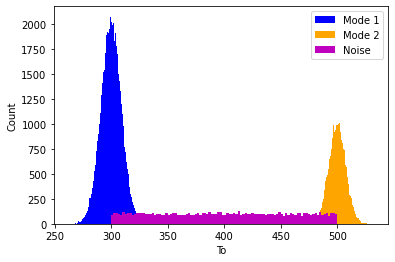

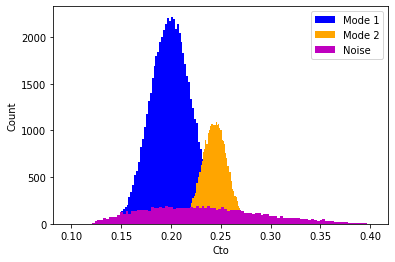

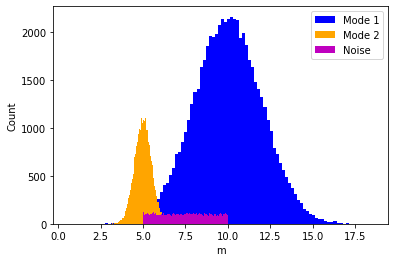

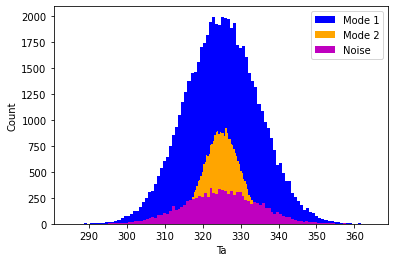

In [11]:
input_value_cols = ['Fao', 'Fbo', 'P', 'To', 'Cto', 'm', 'Ta']
for i, col in enumerate(df[input_value_cols]):
    plt.figure(i)
    plt.hist(df_1[col], bins=100, color='b', label='Mode 1')
    plt.hist(df_2[col], bins=100, color='orange', label='Mode 2')
    plt.hist(df_3[col], bins=100, color='m', label='Noise')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()

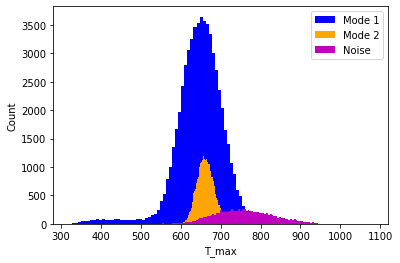

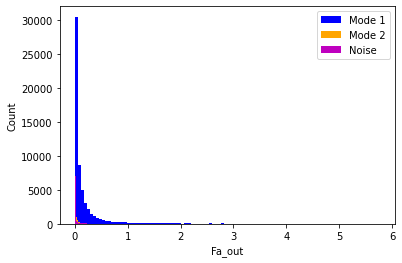

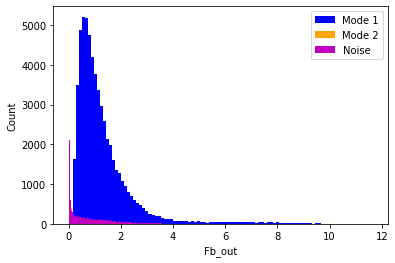

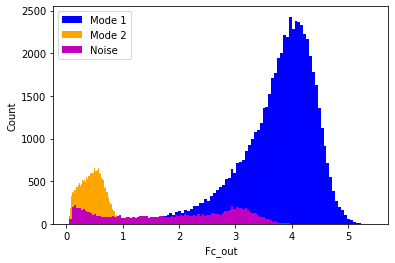

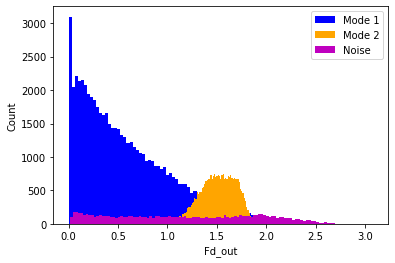

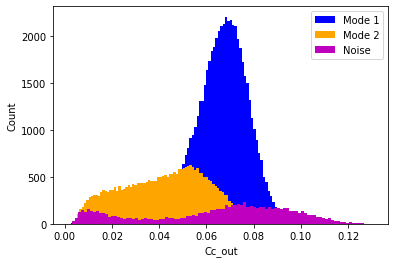

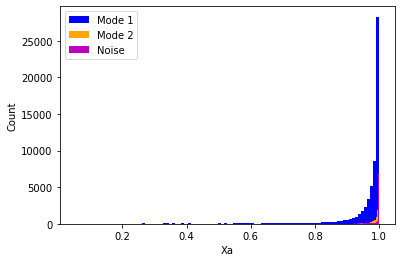

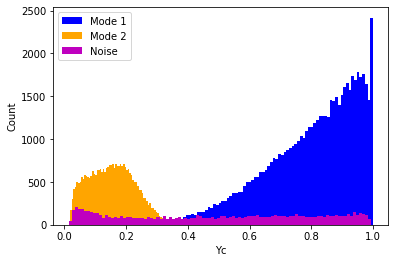

In [12]:
output_value_cols = ['T_max', 'Fa_out', 'Fb_out', 'Fc_out', 'Fd_out', 'Cc_out', 'Xa', 'Yc']
for i, col in enumerate(df[output_value_cols]):
    plt.figure(i)
    plt.hist(df_1[col], bins=100, color='b', label='Mode 1')
    plt.hist(df_2[col], bins=100, color='orange', label='Mode 2')
    plt.hist(df_3[col], bins=100, color='m', label='Noise')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()